# RMixtComp: Titanic example
Unsupervised classification with mixed and missing data

In [1]:
library(RMixtComp)

Loading required package: RMixtCompUtilities



## Data preparation
Import the Titanic dataset included in the package. A `tittanic` dataframe is then available, with 1309 observations and 8 variables.

In [2]:
data(titanic)
titanic[c(1, 16, 38, 169, 285, 1226),]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,1st,1,female,29.0,0,0,211.3375,S
16,1st,0,male,NA,0,0,25.9250,S
38,1st,1,male,NA,0,0,26.5500,S
169,1st,1,female,38.0,0,0,80.0000,NA
285,1st,1,female,62.0,0,0,80.0000,NA
1226,3rd,0,male,60.5,0,0,NA,S


In [3]:
colSums(is.na(titanic))

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0      263        0        0        1        2

Refactor categorical variables to MixtComp format.

In [4]:
titanic$sex <- refactorCategorical(titanic$sex, c("male", "female"), c(1, 2))
titanic$pclass <- refactorCategorical(titanic$pclass, c("1st", "2nd", "3rd"), c(1, 2, 3))
titanic$embarked <- refactorCategorical(titanic$embarked, c("C", "Q", "S"), c(1, 2, 3))
titanic$survived <- refactorCategorical(titanic$survived, c(0, 1), c(1, 2))
titanic[is.na(titanic)] = "?"

In [5]:
titanic[c(1, 16, 38, 169, 285, 1226),]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
1,1,2,2,29,0,0,211.3375,3
16,1,1,1,?,0,0,25.925,3
38,1,2,1,?,0,0,26.55,3
169,1,2,2,38,0,0,80,?
285,1,2,2,62,0,0,80,?
1226,3,1,1,60.5,0,0,?,3


In [6]:
set.seed(42)
titanic$age[sample(which(titanic$age < 10), 20)] = "[0:10]"
titanic$fare[sample(which(titanic$fare > 200), 20)] = "[200:+inf]"
titanic$age[sample(which(titanic$age < 10), 20)] = "[0:10]"
titanic$embarked[sample(which(titanic$embarked == 3), 40)] = "{2, 3}"

## Learning

In [7]:
model <- list(fare = "Gaussian", age = "Gaussian",
              pclass = "Multinomial", survived = "Multinomial",
              sex = "Multinomial", embarked = "Multinomial",
              sibsp = "Poisson", parch = "Poisson")

In [8]:
res <- mixtCompLearn(titanic, model, nClass = 1:20, nRun = 5, nCore = 2)

====== Run MixtComp in learn mode with 5 run(s) per number of classes and 2 core(s)
Data: 1309 individuals and 8 variables.
-- K = 1
Run completed in 1.221s
-- K = 2
Run completed in 0.928s
-- K = 3
Run completed in 1.177s
-- K = 4
Run completed in 1.322s
-- K = 5
Run completed in 1.459s
-- K = 6
Run completed in 1.54s
-- K = 7
Run completed in 1.649s
-- K = 8
Run completed in 1.86s
-- K = 9
Run completed in 1.979s
-- K = 10
Run completed in 2.022s
-- K = 11
Run completed in 2.04s
-- K = 12
Run completed in 2.436s
-- K = 13
Run completed in 2.358s
-- K = 14
Run completed in 2.73s
-- K = 15
Run completed in 2.947s
-- K = 16
Run completed in 3.749s
-- K = 17
Run completed in 4.787s
-- K = 18
Run completed in 5.315s
-- K = 19
Run completed in 6.19s
-- K = 20
Run completed in 6.67s
Total runtime: 54.383s
Best model according to BIC: 13 clusters.


## Output analysis

In [9]:
summary(res)

############### MixtCompLearn Run ###############
nClass: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Criterion used: BIC 
            1         2         3         4         5         6         7
BIC -18067.89 -16136.58 -15825.82 -15004.10 -14839.08 -14742.83 -14657.59
ICL -18067.89 -16175.85 -15881.76 -15092.17 -14906.92 -14846.53 -14740.87
            8         9        10        11        12        13        14
BIC -14571.47 -14522.24 -14478.12 -14456.52 -14519.19 -14417.63 -14442.51
ICL -14691.30 -14696.01      -Inf -14604.00 -14716.05      -Inf -14583.56
           15        16        17        18        19        20
BIC -14490.68 -14470.08 -14423.24 -14512.19 -14513.35 -14545.62
ICL      -Inf      -Inf      -Inf      -Inf -14712.48      -Inf
Best model: 13 clusters 
########### MixtComp Run ###########
Number of individuals: 1309 
Number of variables: 8 
Number of clusters: 13 
Mode: learn 
Time: 0.618 s
SEM burn-in iterations done: 50/50 
SEM run iterations done: 50/50 

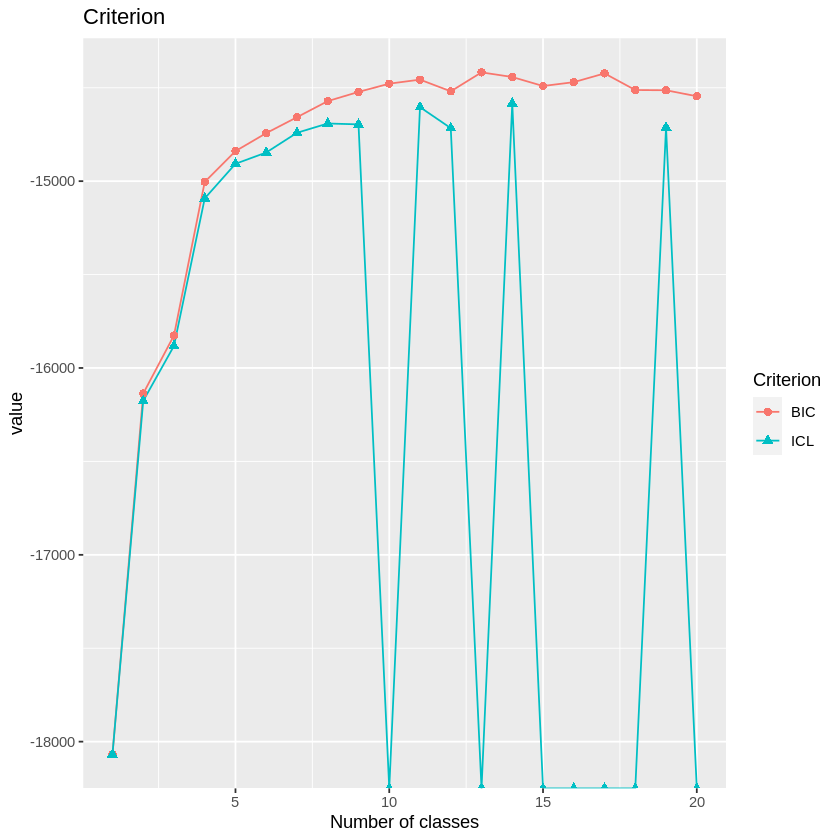

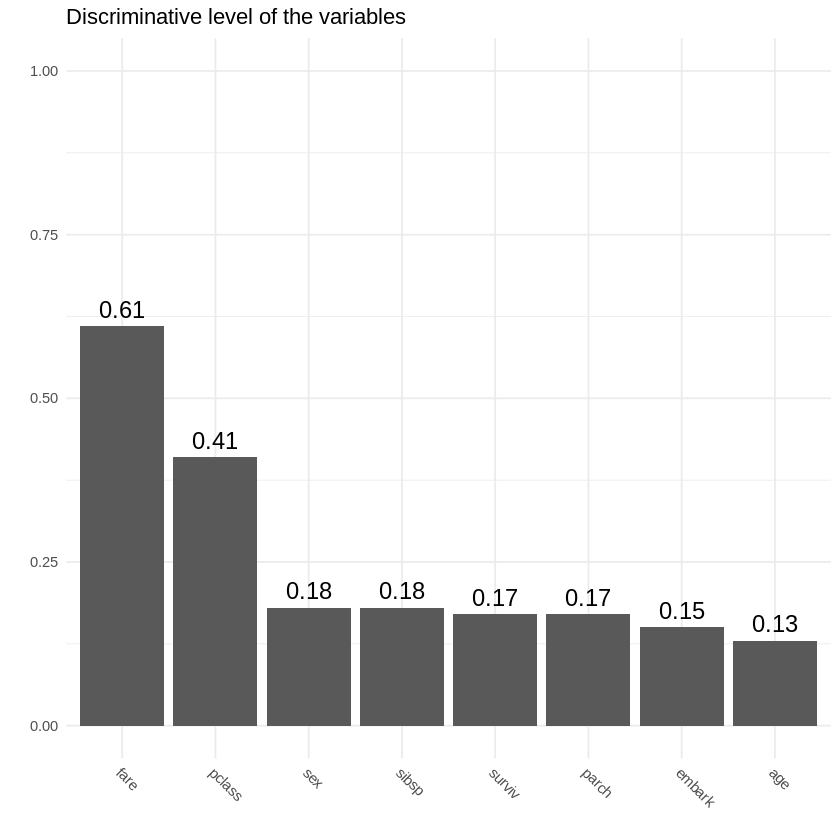

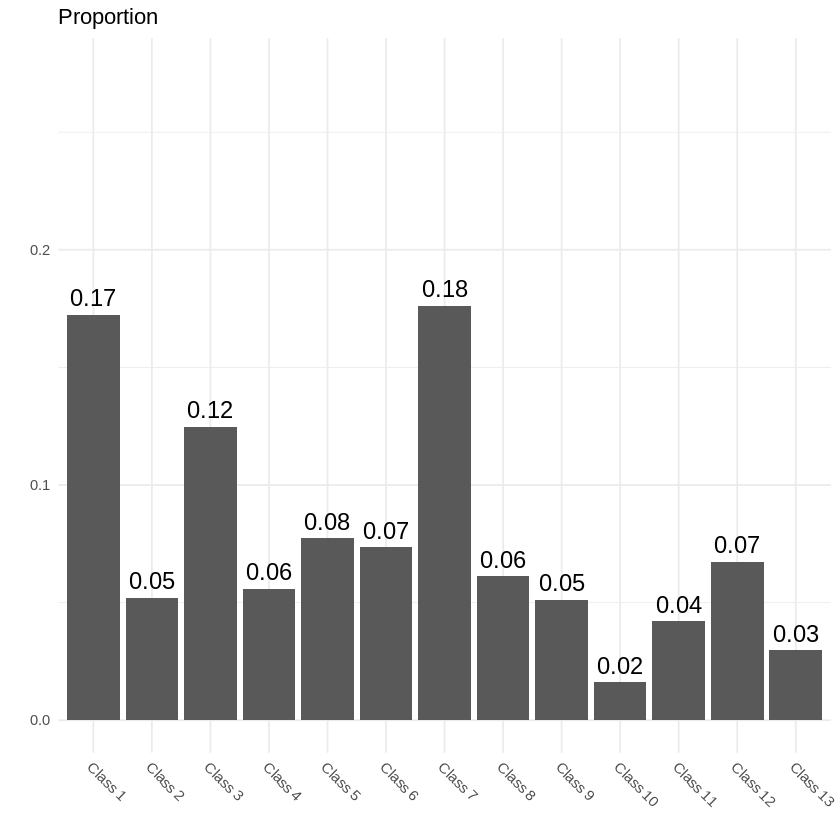

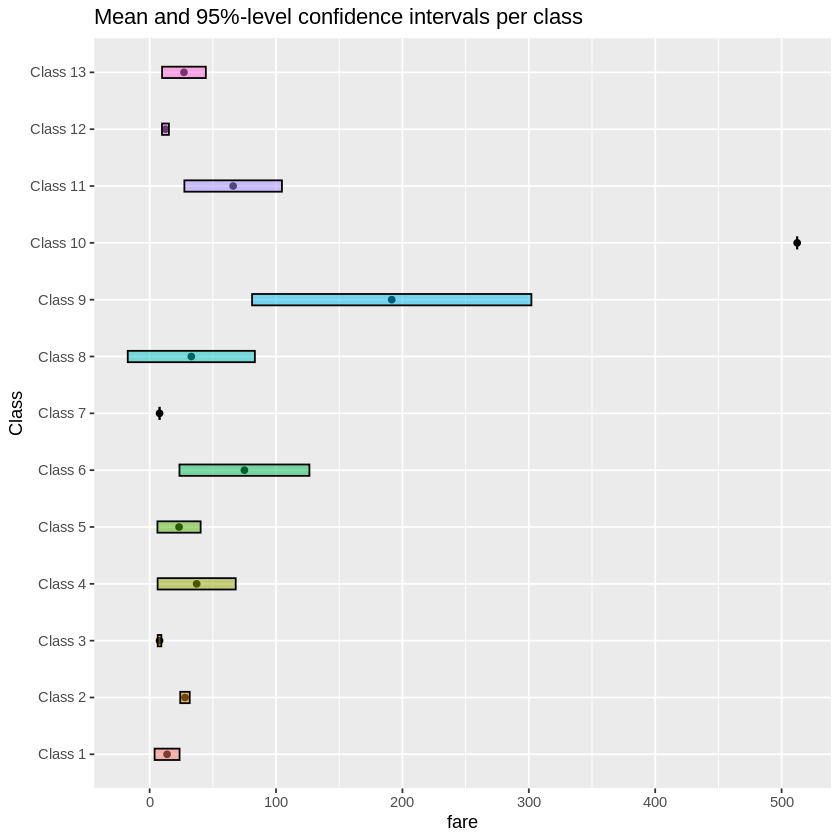

$criteria

$discrimPowerVar

$proportion

$fare

$pclass

$sex


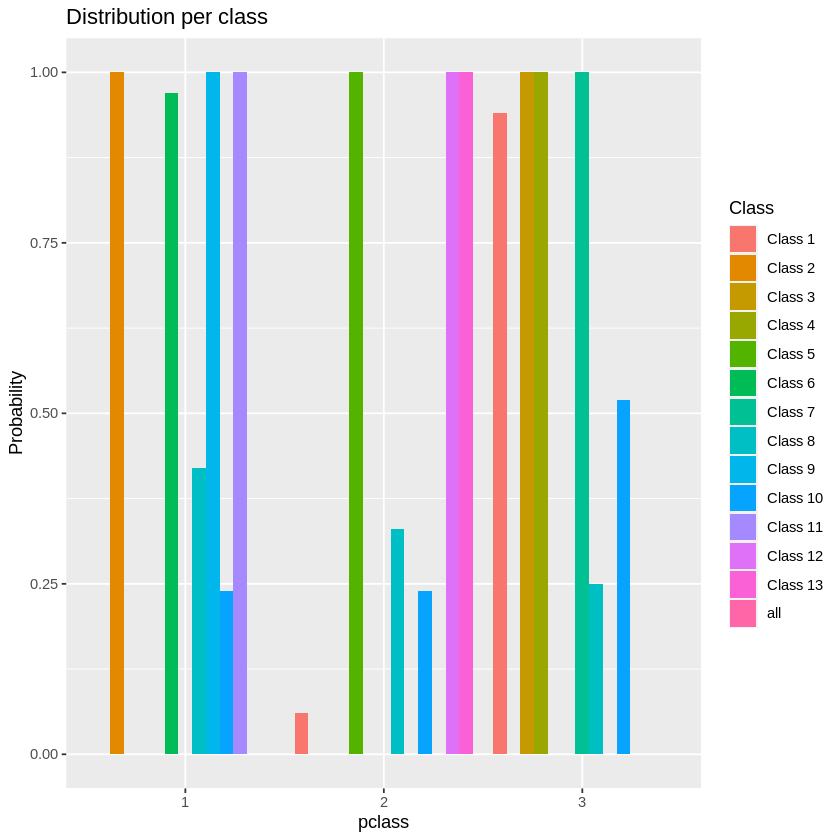

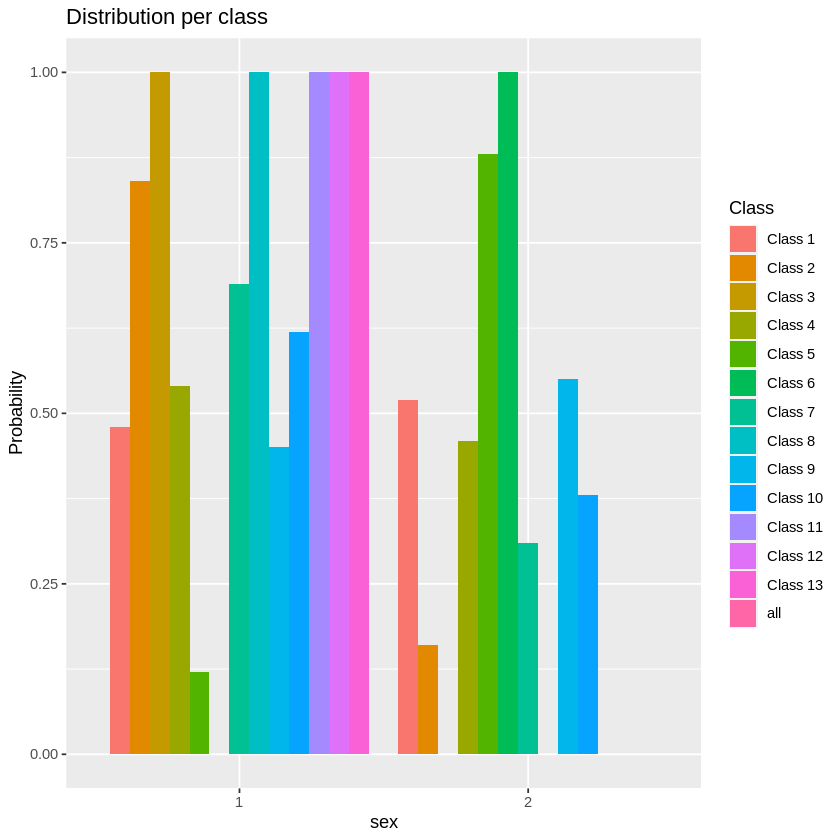

In [10]:
plot(res)

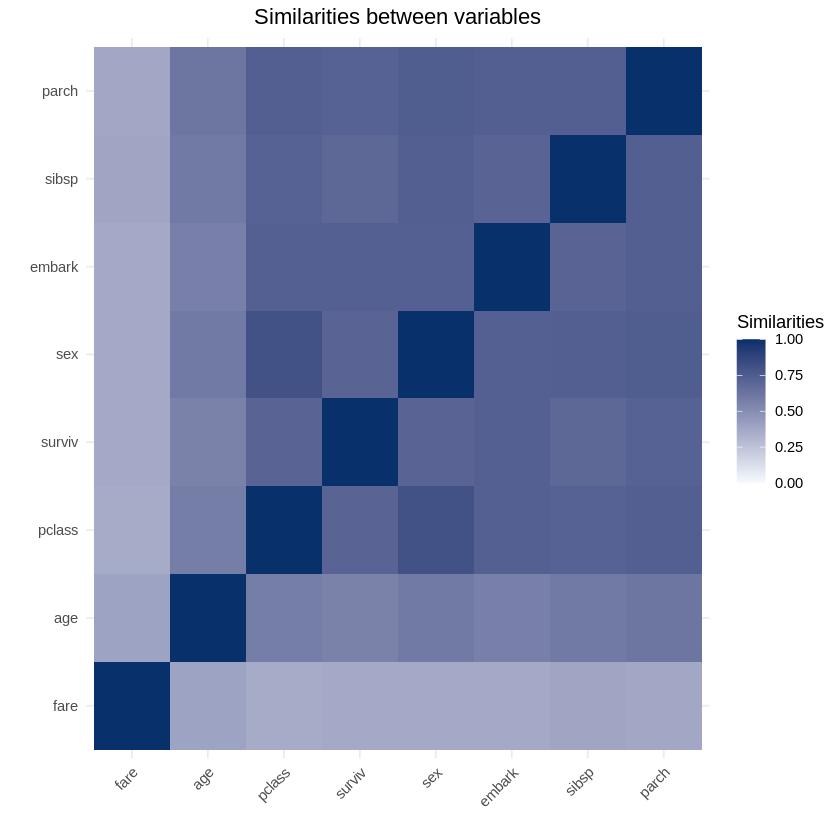

In [11]:
heatmapVar(res)

In [12]:
round(computeSimilarityVar(res), 2)

,fare,age,pclass,survived,sex,embarked,sibsp,parch
fare,1.00,0.38,0.40,0.37,0.36,0.39,0.37,0.37
age,0.38,1.00,0.62,0.75,0.74,0.74,0.72,0.74
pclass,0.40,0.62,1.00,0.60,0.58,0.60,0.56,0.57
survived,0.37,0.75,0.60,1.00,0.81,0.74,0.71,0.73
sex,0.36,0.74,0.58,0.81,1.00,0.72,0.71,0.73
embarked,0.39,0.74,0.60,0.74,0.72,1.00,0.69,0.71
sibsp,0.37,0.72,0.56,0.71,0.71,0.69,1.00,0.73
parch,0.37,0.74,0.57,0.73,0.73,0.71,0.73,1.00


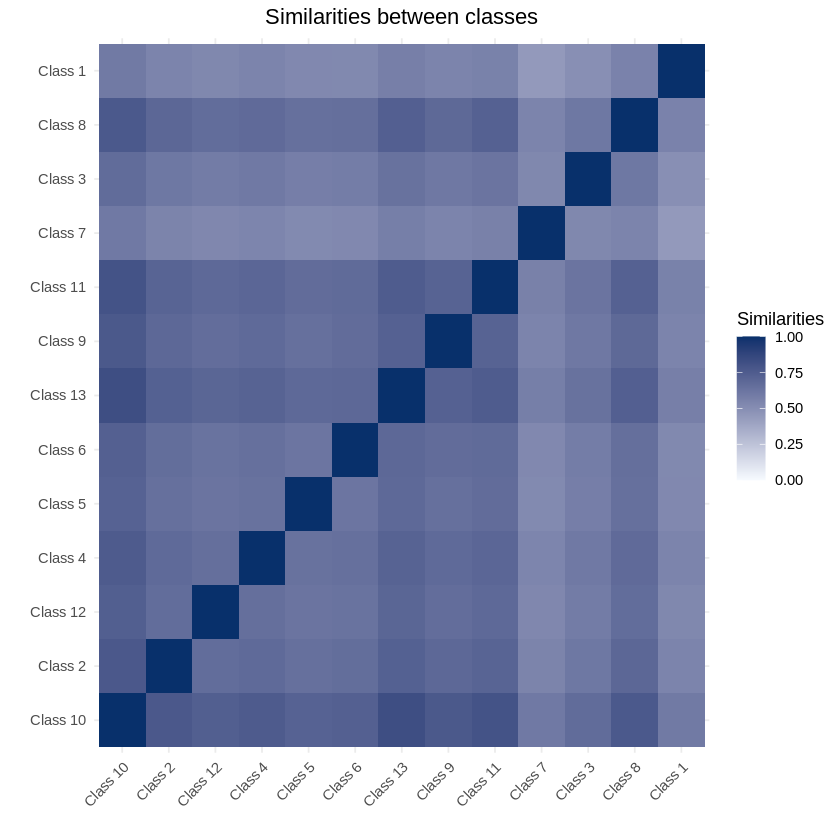

In [13]:
heatmapClass(res)

In [14]:
round(computeSimilarityClass(res), 2)

,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,Class 10,Class 11,Class 12,Class 13
Class 1,1.00,0.55,0.49,0.55,0.53,0.53,0.45,0.56,0.55,0.60,0.56,0.53,0.57
Class 2,0.55,1.00,0.61,0.68,0.65,0.66,0.55,0.70,0.69,0.77,0.71,0.67,0.73
Class 3,0.49,0.61,1.00,0.60,0.58,0.59,0.53,0.61,0.61,0.67,0.63,0.59,0.64
Class 4,0.55,0.68,0.60,1.00,0.64,0.65,0.54,0.68,0.68,0.76,0.70,0.66,0.72
Class 5,0.53,0.65,0.58,0.64,1.00,0.62,0.52,0.65,0.65,0.72,0.67,0.63,0.68
Class 6,0.53,0.66,0.59,0.65,0.62,1.00,0.53,0.66,0.67,0.73,0.68,0.64,0.69
Class 7,0.45,0.55,0.53,0.54,0.52,0.53,1.00,0.55,0.55,0.60,0.57,0.53,0.58
Class 8,0.56,0.70,0.61,0.68,0.65,0.66,0.55,1.00,0.69,0.77,0.73,0.67,0.74
Class 9,0.55,0.69,0.61,0.68,0.65,0.67,0.55,0.69,1.00,0.77,0.72,0.67,0.73
Class 10,0.60,0.77,0.67,0.76,0.72,0.73,0.60,0.77,0.77,1.00,0.80,0.74,0.83
